### Importing the libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import os

In [58]:
path = os.getcwd()
path = path + '/data/track_features/tf_mini.csv'


df_track = pd.read_csv('tf_mini.csv')
df_logs = pd.read_csv('log_mini.csv')

pd.set_option('display.max_columns', None)

df_track.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,0.903753,3.254327e-06,0,0.132124,-11.238,0.386100,major,0.541606,0.079985,166.287003,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,1.037952,8.344854e-12,0,0.163281,-13.706,0.125000,major,0.895874,0.083877,95.261002,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,1.004268,2.927475e-10,0,0.090115,-10.522,0.200669,minor,0.806136,0.038777,105.185997,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,0.975138,3.981341e-11,0,0.360924,-11.032,0.427152,major,0.492772,0.038337,119.441002,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,0.976866,2.541884e-10,0,0.189162,-6.836,0.281250,major,0.723808,0.032043,95.261002,4,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


In [24]:
df_track.shape

(50704, 30)

In [25]:
df_track.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50704 entries, 0 to 50703
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   track_id                50704 non-null  object 
 1   duration                50704 non-null  float64
 2   release_year            50704 non-null  int64  
 3   us_popularity_estimate  50704 non-null  float64
 4   acousticness            50704 non-null  float64
 5   beat_strength           50704 non-null  float64
 6   bounciness              50704 non-null  float64
 7   danceability            50704 non-null  float64
 8   dyn_range_mean          50704 non-null  float64
 9   energy                  50704 non-null  float64
 10  flatness                50704 non-null  float64
 11  instrumentalness        50704 non-null  float64
 12  key                     50704 non-null  int64  
 13  liveness                50704 non-null  float64
 14  loudness                50704 non-null

In [26]:
df_track.columns

Index(['track_id', 'duration', 'release_year', 'us_popularity_estimate',
       'acousticness', 'beat_strength', 'bounciness', 'danceability',
       'dyn_range_mean', 'energy', 'flatness', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mechanism', 'mode', 'organism', 'speechiness',
       'tempo', 'time_signature', 'valence', 'acoustic_vector_0',
       'acoustic_vector_1', 'acoustic_vector_2', 'acoustic_vector_3',
       'acoustic_vector_4', 'acoustic_vector_5', 'acoustic_vector_6',
       'acoustic_vector_7'],
      dtype='object')

In [27]:
df_track.describe()

,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
count,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,...,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000
mean,222.267980,2010.324748,99.455131,0.250336,0.492075,0.514526,0.611742,8.215950,0.641440,0.996548,...,3.913163,0.487804,-0.332295,0.202193,0.153935,-0.040526,-0.027247,0.049475,-0.197758,0.005153
std,72.224839,11.471866,1.139222,0.276047,0.158102,0.182595,0.166146,2.410626,0.207957,0.045611,...,0.410036,0.246376,0.416320,0.254024,0.212660,0.333129,0.377457,0.144205,0.349840,0.324259
min,30.013330,1950.000000,90.018900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.122792,-1.084360,-0.752231,-0.809136,-1.029858,-0.942461,-0.736395,-0.975647
25%,183.933334,2009.000000,99.509670,0.025291,0.374378,0.372463,0.502499,6.356671,0.507839,0.975910,...,4.000000,0.292559,-0.745148,0.086460,0.051604,-0.294574,-0.318751,-0.038337,-0.444849,-0.176821
50%,214.866669,2015.000000,99.865444,0.135821,0.493764,0.522266,0.625145,8.015075,0.661368,1.003790,...,4.000000,0.478244,-0.334799,0.265535,0.207705,-0.001755,-0.176974,0.062719,-0.298599,0.090423
75%,250.426666,2017.000000,99.961131,0.406142,0.604994,0.655912,0.736241,9.792092,0.803185,1.026137,...,4.000000,0.677947,0.045921,0.359553,0.296132,0.146828,0.280852,0.160366,-0.075158,0.194285
max,1787.760986,2018.000000,99.999997,0.995796,0.990419,0.972590,0.984952,32.342781,0.999877,1.103213,...,5.000000,0.999990,0.932165,0.812837,0.605288,1.074504,0.895769,0.380279,0.966760,1.152213


#### Lets explore each columns further in

The min duration: 30.013330459594727
The max duration: 1787.760986328125


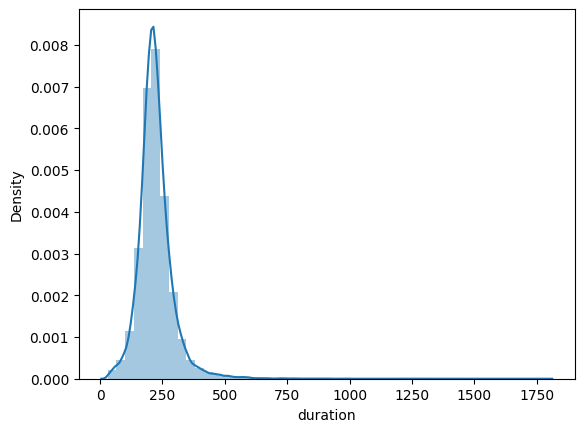

In [28]:
print('The min duration: {}'.format(df_track['duration'].min()))
print('The max duration: {}'.format(df_track['duration'].max()))

sns.distplot(df_track['duration'])
plt.show()

In [29]:
df_track['duration'].describe()

count    50704.000000
mean       222.267980
std         72.224839
min         30.013330
25%        183.933334
50%        214.866669
75%        250.426666
max       1787.760986
Name: duration, dtype: float64

In [30]:
df_track.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,...,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,...,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,...,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,...,4,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


In [31]:
# There are no duplicates here
df_track['track_id'].value_counts().shape[0] == df_track['track_id'].nunique()

True

In [32]:
#Converting the max track duration in miniutes
df_track['duration'].max() * 0.0166667


29.79607603083496

#### 29 mins for a song track. Maybe its a podcast

In [33]:
df_track[df_track['track_id'] == 't_a540e552-16d4-42f8-a185-232bd650ea7d']

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.45804,0.519497,0.504949,0.399767,7.51188,0.817709,...,4,0.935512,-0.033284,-0.411896,-0.02858,0.349438,0.832467,-0.213871,-0.299464,-0.675907


In [34]:
# Checking the same track id in logs df

df_logs[df_logs['track_id_clean'] == 't_a540e552-16d4-42f8-a185-232bd650ea7d']

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
163671,0_0e4a49d8-688d-4958-94db-5cb56adc3090,10,10,t_a540e552-16d4-42f8-a185-232bd650ea7d,False,False,False,False,0,1,...,0,0,0,True,10,2018-07-15,True,user_collection,trackdone,trackdone


In [35]:
df_logs.isnull().sum()

session_id                         0
session_position                   0
session_length                     0
track_id_clean                     0
skip_1                             0
skip_2                             0
skip_3                             0
not_skipped                        0
context_switch                     0
no_pause_before_play               0
short_pause_before_play            0
long_pause_before_play             0
hist_user_behavior_n_seekfwd       0
hist_user_behavior_n_seekback      0
hist_user_behavior_is_shuffle      0
hour_of_day                        0
date                               0
premium                            0
context_type                       0
hist_user_behavior_reason_start    0
hist_user_behavior_reason_end      0
dtype: int64

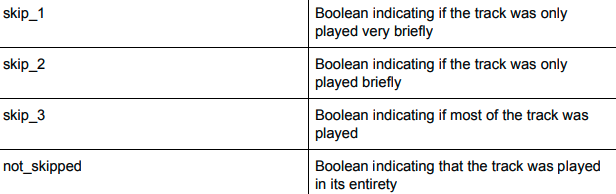

In [48]:
def get_skip_stats(df_logs):

    cols = ['skip_1','skip_2','skip_3','not_skipped']

    for col in cols:
        print("% of data in each category for {} column".format(col))
        print(df_logs[col].value_counts(normalize=True).reset_index().T)
        print('-------------------------------')


get_skip_stats(df_logs)

% of data in each category for skip_1 column
               0         1
index      False      True
skip_1  0.578497  0.421503
-------------------------------
% of data in each category for skip_2 column
               0         1
index       True     False
skip_2  0.517179  0.482821
-------------------------------
% of data in each category for skip_3 column
              0        1
index      True    False
skip_3  0.64838  0.35162
-------------------------------
% of data in each category for not_skipped column
                    0         1
index           False      True
not_skipped  0.667119  0.332881
-------------------------------


#### Let us choose the skip_2 as there are almost equal number of % in each category. 

In [50]:
df_logs['session_id'].value_counts()

0_00006f66-33e5-4de7-a324-2d18e439fc1e    20
0_08317754-b299-481b-ae44-e74b4b232ac2    20
0_0821a0cd-2a85-4ceb-8c11-a1a4748e74d8    20
0_08202dbe-7375-49eb-a793-2d1579fb3afd    20
0_081fc470-cea4-4a3f-a238-22099654c153    20
                                          ..
0_088b55d4-9da8-4237-91f0-5579d811986b    10
0_030d00a4-de73-4697-a1a6-b765e231f80d    10
0_0d207bfd-43fe-4b1e-8c8f-736536555140    10
0_030ea191-5c2c-45ae-8ae7-a1875adabe86    10
0_084483a5-5562-4305-bc68-5687110700f5    10
Name: session_id, Length: 10000, dtype: int64

In [56]:
df_logs[df_logs['session_id'] == '0_088b55d4-9da8-4237-91f0-5579d811986b'].sort_values(by='track_id_clean')

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
98270,0_088b55d4-9da8-4237-91f0-5579d811986b,1,10,t_3a5c2332-9fe3-4721-8744-be15967d7dd8,False,True,True,False,0,0,...,0,0,0,False,13,2018-07-15,True,catalog,clickrow,endplay
98274,0_088b55d4-9da8-4237-91f0-5579d811986b,5,10,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,False,False,False,True,0,1,...,0,0,0,False,13,2018-07-15,True,catalog,trackdone,trackdone
98276,0_088b55d4-9da8-4237-91f0-5579d811986b,7,10,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,False,False,False,True,0,1,...,0,0,0,False,13,2018-07-15,True,catalog,backbtn,trackdone
98278,0_088b55d4-9da8-4237-91f0-5579d811986b,9,10,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,True,True,True,False,0,1,...,0,0,0,False,13,2018-07-15,True,catalog,backbtn,backbtn
98271,0_088b55d4-9da8-4237-91f0-5579d811986b,2,10,t_66173dc5-6f73-4514-b904-70e6c0011eae,False,False,False,True,1,1,...,0,0,0,False,13,2018-07-15,True,catalog,clickrow,trackdone
98275,0_088b55d4-9da8-4237-91f0-5579d811986b,6,10,t_ab55b9b5-3a1a-46a4-b58a-1c29136a08e2,False,True,True,False,0,0,...,1,0,1,False,13,2018-07-15,True,catalog,trackdone,backbtn
98277,0_088b55d4-9da8-4237-91f0-5579d811986b,8,10,t_ab55b9b5-3a1a-46a4-b58a-1c29136a08e2,False,True,True,False,0,1,...,0,0,1,False,13,2018-07-15,True,catalog,trackdone,backbtn
98273,0_088b55d4-9da8-4237-91f0-5579d811986b,4,10,t_bacf06d3-9185-4183-84ea-ff0db51475ce,False,False,False,True,1,1,...,0,0,0,False,13,2018-07-15,True,catalog,clickrow,trackdone
98279,0_088b55d4-9da8-4237-91f0-5579d811986b,10,10,t_bacf06d3-9185-4183-84ea-ff0db51475ce,False,False,False,True,0,1,...,0,0,0,False,13,2018-07-15,True,catalog,backbtn,trackdone
98272,0_088b55d4-9da8-4237-91f0-5579d811986b,3,10,t_e4dea389-5cad-42be-ac8b-e8bca670738d,False,True,True,False,0,1,...,0,0,0,False,13,2018-07-15,True,catalog,trackdone,endplay


In [55]:
df_logs[df_logs['session_id'] == '0_088b55d4-9da8-4237-91f0-5579d811986b']['track_id_clean'].value_counts()

t_5718ab08-3a15-4d3f-9e63-42b2f6805e31    3
t_bacf06d3-9185-4183-84ea-ff0db51475ce    2
t_ab55b9b5-3a1a-46a4-b58a-1c29136a08e2    2
t_3a5c2332-9fe3-4721-8744-be15967d7dd8    1
t_66173dc5-6f73-4514-b904-70e6c0011eae    1
t_e4dea389-5cad-42be-ac8b-e8bca670738d    1
Name: track_id_clean, dtype: int64

Lets check the status(skip_2) of tracks 

In [78]:
df_logs[df_logs['track_id_clean'] == 't_5718ab08-3a15-4d3f-9e63-42b2f6805e31'][['track_id_clean','skip_2']].value_counts().reset_index()

,track_id_clean,skip_2,0
0,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,False,480
1,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,True,435


status(skip_3) of the track

In [79]:
df_logs[df_logs['track_id_clean'] == 't_5718ab08-3a15-4d3f-9e63-42b2f6805e31'][['track_id_clean','skip_3']].value_counts().reset_index()

,track_id_clean,skip_3,0
0,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,True,579
1,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,False,336


In [81]:
df_logs[df_logs['track_id_clean'] == 't_5718ab08-3a15-4d3f-9e63-42b2f6805e31'][['track_id_clean','not_skipped']].value_counts().reset_index()

,track_id_clean,not_skipped,0
0,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,False,584
1,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,True,331


#### What about tracks which are being played in a certain session mutiple times?

In [59]:
df_logs[(df_logs['session_id'] == '0_088b55d4-9da8-4237-91f0-5579d811986b') & (df_logs['track_id_clean'] == 't_5718ab08-3a15-4d3f-9e63-42b2f6805e31')]

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
98274,0_088b55d4-9da8-4237-91f0-5579d811986b,5,10,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,False,False,False,True,0,1,0,0,0,0,False,13,2018-07-15,True,catalog,trackdone,trackdone
98276,0_088b55d4-9da8-4237-91f0-5579d811986b,7,10,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,False,False,False,True,0,1,0,0,0,0,False,13,2018-07-15,True,catalog,backbtn,trackdone
98278,0_088b55d4-9da8-4237-91f0-5579d811986b,9,10,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,True,True,True,False,0,1,0,0,0,0,False,13,2018-07-15,True,catalog,backbtn,backbtn


Lets finalize the target column and see how it looks like overall

In [84]:
df_logs_mod = df_logs.copy()

df_logs_mod.drop(columns=['skip_1','not_skipped','skip_3'], axis = 1, inplace=True)

In [85]:
df_logs_mod[(df_logs_mod['session_id'] == '0_088b55d4-9da8-4237-91f0-5579d811986b') & (df_logs_mod['track_id_clean'] == 't_5718ab08-3a15-4d3f-9e63-42b2f6805e31')]

,session_id,session_position,session_length,track_id_clean,skip_2,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
98274,0_088b55d4-9da8-4237-91f0-5579d811986b,5,10,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,False,0,1,0,0,0,0,False,13,2018-07-15,True,catalog,trackdone,trackdone
98276,0_088b55d4-9da8-4237-91f0-5579d811986b,7,10,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,False,0,1,0,0,0,0,False,13,2018-07-15,True,catalog,backbtn,trackdone
98278,0_088b55d4-9da8-4237-91f0-5579d811986b,9,10,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,True,0,1,0,0,0,0,False,13,2018-07-15,True,catalog,backbtn,backbtn


In [68]:
df_logs['context_type'].value_counts()

user_collection          67430
catalog                  38263
editorial_playlist       35663
radio                    21107
personalized_playlist     2976
charts                    2441
Name: context_type, dtype: int64

In [70]:
df_logs['hist_user_behavior_reason_start'].value_counts()

fwdbtn        79912
trackdone     55075
clickrow      17514
backbtn       13034
appload        1942
playbtn         155
remote          136
trackerror       92
endplay          20
Name: hist_user_behavior_reason_start, dtype: int64

In [71]:
df_logs['hist_user_behavior_reason_end'].value_counts()

fwdbtn       81389
trackdone    57701
endplay      14823
backbtn      13129
logout         563
remote         267
clickrow         8
Name: hist_user_behavior_reason_end, dtype: int64

<Axes: xlabel='index', ylabel='hour_of_day'>

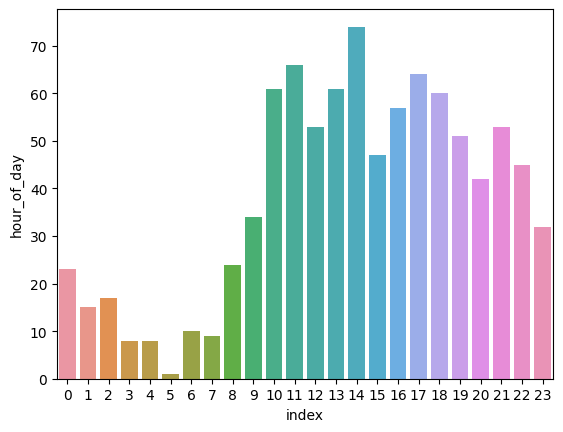

In [102]:
df_logs_mod[df_logs_mod['track_id_clean'] == 't_5718ab08-3a15-4d3f-9e63-42b2f6805e31']['hour_of_day'].value_counts().reset_index()

sns.barplot(data=df_logs_mod,
         x=df_logs_mod[df_logs_mod['track_id_clean'] == 't_5718ab08-3a15-4d3f-9e63-42b2f6805e31']['hour_of_day'].value_counts().reset_index()['index'],
         y=df_logs_mod[df_logs_mod['track_id_clean'] == 't_5718ab08-3a15-4d3f-9e63-42b2f6805e31']['hour_of_day'].value_counts().reset_index()['hour_of_day']
        )

<Axes: ylabel='count'>

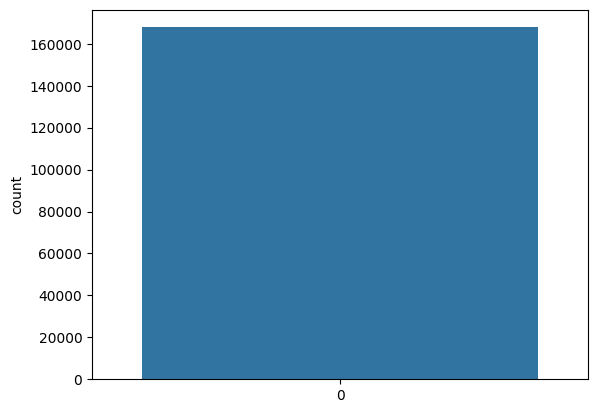

In [93]:
sns.countplot(df_logs_mod['hour_of_day'])

In [95]:
df_logs_mod['hour_of_day'].value_counts()

16    11636
14    11590
15    11443
17    10897
13    10687
18    10319
21     9918
12     9696
19     9487
20     9366
22     8822
11     8320
10     7483
23     7230
0      5694
9      5555
1      4127
8      3397
2      2964
7      2366
3      2284
6      1733
4      1563
5      1303
Name: hour_of_day, dtype: int64

In [117]:
cols = ['track_id_clean','skip_2', 'context_switch', 'no_pause_before_play',
       'short_pause_before_play', 'long_pause_before_play',
       'hist_user_behavior_n_seekfwd', 'hist_user_behavior_n_seekback',
       'hist_user_behavior_is_shuffle', 'hour_of_day', 'date', 'premium',
       'context_type', 'hist_user_behavior_reason_start',
       'hist_user_behavior_reason_end']

df_logs_mod[df_logs_mod['track_id_clean'] == 't_5718ab08-3a15-4d3f-9e63-42b2f6805e31'][cols].drop_duplicates().head(10)

,track_id_clean,skip_2,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
92,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,False,0,1,0,0,0,0,False,8,2018-07-15,True,catalog,clickrow,trackdone
311,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,False,0,0,1,1,0,2,False,11,2018-07-15,True,editorial_playlist,trackdone,backbtn
315,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,True,0,1,0,0,0,0,False,11,2018-07-15,True,editorial_playlist,trackdone,fwdbtn
319,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,True,0,1,0,0,0,0,False,11,2018-07-15,True,editorial_playlist,backbtn,backbtn
321,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,True,0,1,0,0,0,2,False,11,2018-07-15,True,editorial_playlist,trackdone,backbtn
325,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,True,0,1,0,0,0,1,False,11,2018-07-15,True,editorial_playlist,trackdone,backbtn
478,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,False,1,1,0,0,0,0,False,10,2018-07-15,True,editorial_playlist,clickrow,trackdone
570,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,True,0,1,0,0,0,0,False,22,2018-07-14,True,charts,fwdbtn,fwdbtn
660,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,False,0,1,0,0,0,0,False,9,2018-07-15,True,editorial_playlist,fwdbtn,trackdone
756,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,False,0,1,0,0,0,0,False,14,2018-07-15,True,editorial_playlist,fwdbtn,trackdone


In [118]:
df_logs_mod[df_logs_mod['hist_user_behavior_n_seekback'] != 0]['']

,session_id,session_position,session_length,track_id_clean,skip_2,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
20,0_0000a72b-09ac-412f-b452-9b9e79bded8f,1,20,t_e975c3a1-6a6c-4955-8bc7-02eb8e701bec,True,0,0,0,0,0,1,True,14,2018-07-15,True,user_collection,trackdone,fwdbtn
84,0_00018b58-deb8-4f98-ac5e-d7e01b346130,5,11,t_36ade65b-c65b-46d1-bf77-36ed5c7f6f6b,False,0,1,0,0,0,1,False,13,2018-07-15,True,user_collection,fwdbtn,trackdone
161,0_0003ac37-c70a-47a6-b9dc-b8b163826082,1,20,t_560c7c23-875f-4067-b15d-b5c596f368c6,False,0,0,0,0,0,1,False,11,2018-07-15,True,user_collection,trackdone,endplay
173,0_0003ac37-c70a-47a6-b9dc-b8b163826082,13,20,t_3f1dd28c-e0cf-4b28-ab54-333474e9da95,False,0,1,0,0,0,1,False,11,2018-07-15,True,user_collection,clickrow,trackdone
186,0_0003e8a0-ea43-47fe-ac5a-8b502f4d38ef,6,20,t_a8afac0c-d6f8-4df7-b934-5904e2f76fc1,True,1,1,0,0,0,1,False,11,2018-07-15,True,radio,clickrow,backbtn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167778,0_0eabeb73-eb50-412c-80dc-dfc832581563,5,14,t_0808114a-1af3-42c1-b62f-79308b0ac4f4,False,0,0,1,1,0,1,False,12,2018-07-15,True,catalog,trackdone,backbtn
167783,0_0eabeb73-eb50-412c-80dc-dfc832581563,10,14,t_d0b94483-2e1f-4b76-ab74-7d2d749dfa94,False,0,0,1,1,0,1,False,12,2018-07-15,True,catalog,trackdone,backbtn
167787,0_0eabeb73-eb50-412c-80dc-dfc832581563,14,14,t_ff15dbcb-b7c9-4eb0-beeb-eb443cfc3403,True,0,0,1,1,0,1,False,12,2018-07-15,True,catalog,trackdone,backbtn
167808,0_0eacbee7-9868-48a0-9ab0-f86069329f50,1,20,t_900f7a9e-e082-4378-8705-ecce236cddf6,False,0,0,0,0,0,1,False,19,2018-07-14,True,radio,fwdbtn,trackdone


In [131]:
df_logs_mod = df_logs_mod[cols].drop_duplicates()

In [137]:
cols = ['track_id','target','context_switch','no_pause_before_play','short_pause_before_play','long_pause_before_play','hist_user_behavior_n_seekfwd',
        'hist_user_behavior_n_seekback','hist_user_behavior_is_shuffle','hour_of_day','date','premium','context_type','hist_user_behavior_reason_start','hist_user_behavior_reason_end']

In [138]:
df_logs_mod.columns = cols

In [140]:
df_logs_mod.head()

,track_id,target,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,0,0,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


### Exploratory Data Analysis

1. How does the target vary based on the context switch

In [147]:
sns.countplot(df_logs_mod[df_logs_mod['context_switch'] == 1]['target'])

KeyError: 0

In [148]:
df_logs_mod

,track_id,target,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,0,0,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167875,t_360910e8-2a84-42b0-baf1-59abcf96a1f2,False,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone
167876,t_aa2fff77-9b0a-4fa3-a685-ecef50310e8a,False,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone
167877,t_f673e1b7-4ebe-4fc1-ac24-a9f25de70381,False,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone
167878,t_e172e8e7-7161-42a9-acb0-d606346c8f87,False,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone
